# Merging species counts tables into one counts table for all species

## Still to take into consideration, multiple contigs per gene

Might want to settle on one contig per gene, based on length and E-value. One annotation per contig was already selected based on top E-value. Now, we can look at length of the contig?

In [25]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [26]:
gene_out_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/contig_gene_name_01July2018_filtnew/"
genes_matrices = os.listdir(gene_out_dir)

19814


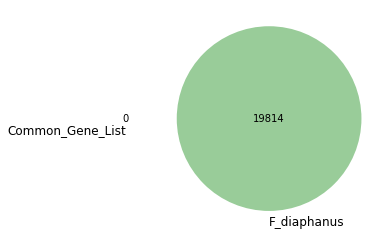

25442


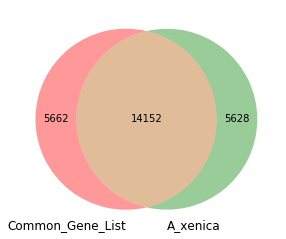

29919


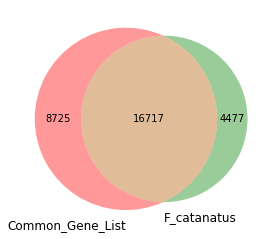

33421


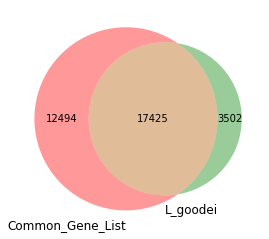

36887


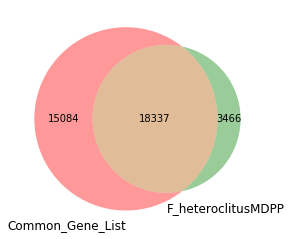

38805


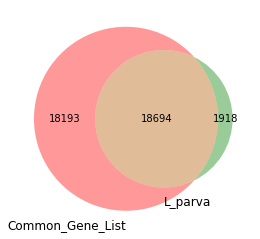

40202


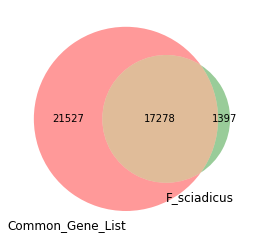

42088


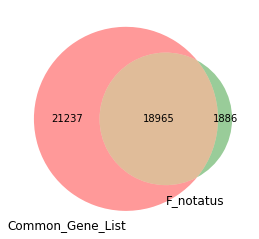

43645


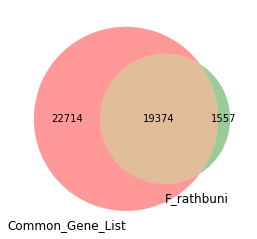

45503


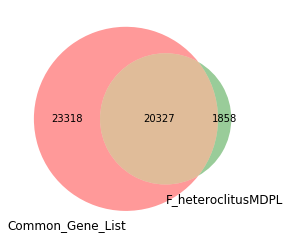

46356


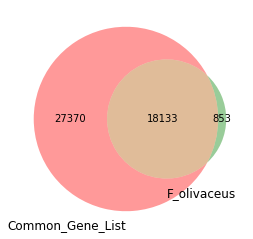

48644


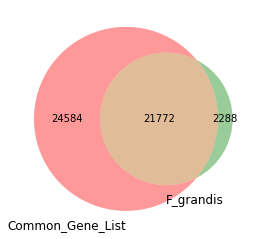

49896


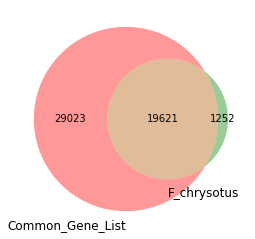

50653


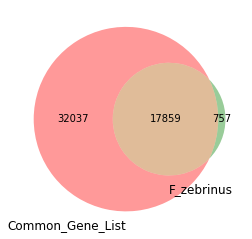

51594


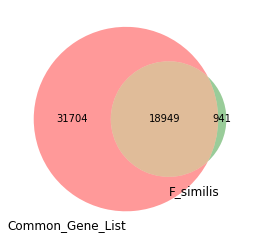

52305


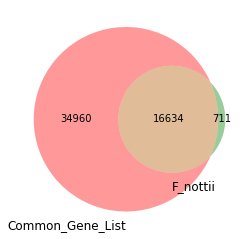

53023


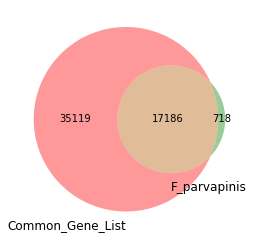

In [27]:
gene_list_common = []
# construct common gene list (union)
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['GeneName'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [28]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

106046
53023


18159


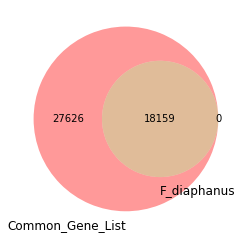

18016


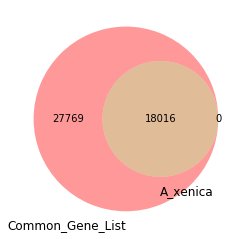

19035


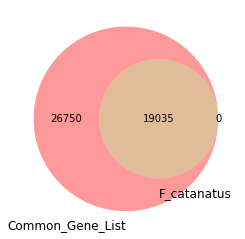

18664


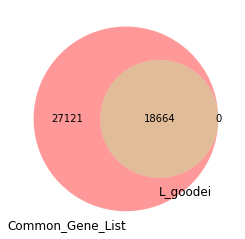

19095


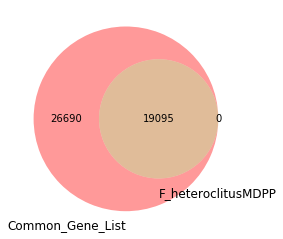

18602


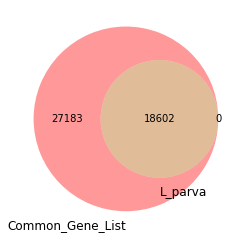

17766


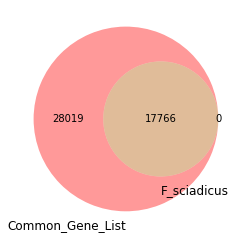

18725


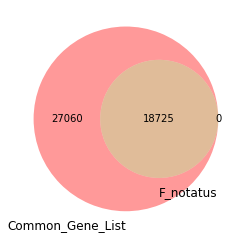

18395


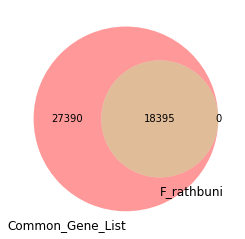

18980


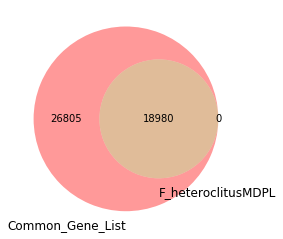

17527


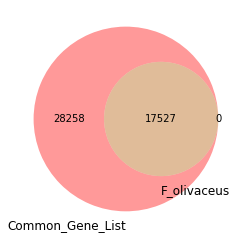

19537


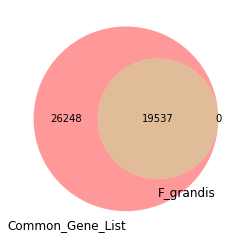

18705


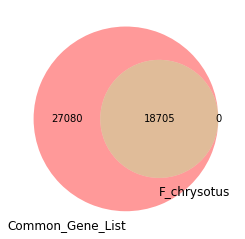

18103


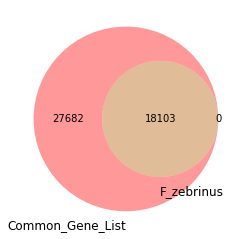

18089


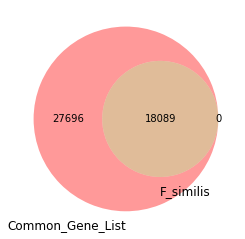

19080


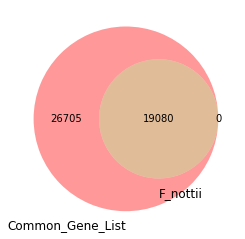

15643


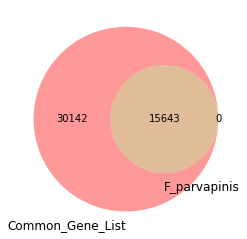

In [13]:
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['GeneName'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [14]:
print(genes_matrices)
print(len(genes_matrices))

['F_diaphanus_gene_counts_annotations_filt.csv', 'A_xenica_gene_counts_annotations_filt.csv', 'F_catanatus_gene_counts_annotations_filt.csv', '.DS_Store', 'L_goodei_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPP_gene_counts_annotations_filt.csv', 'L_parva_gene_counts_annotations_filt.csv', 'F_sciadicus_gene_counts_annotations_filt.csv', 'F_notatus_gene_counts_annotations_filt.csv', 'F_rathbuni_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPL_gene_counts_annotations_filt.csv', 'F_olivaceus_gene_counts_annotations_filt.csv', 'F_grandis_gene_counts_annotations_filt.csv', 'F_chrysotus_gene_counts_annotations_filt.csv', 'F_zebrinus_gene_counts_annotations_filt.csv', 'F_similis_gene_counts_annotations_filt.csv', 'F_nottii_gene_counts_annotations_filt.csv', 'F_parvapinis_gene_counts_annotations_filt.csv']
18


In [15]:
count = 0
gene_list_common = []
for genes_file1 in genes_matrices:
    if genes_file1 != ".DS_Store":
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in genes_matrices:
            if genes_file2 != genes_file1:
                if genes_file2 != ".DS_Store":
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(gene_out_dir+genes_file1)
                    table2 = pd.read_csv(gene_out_dir+genes_file2)
                    species_genes1 = table1['GeneName'].tolist()
                    species_genes2 = table2['GeneName'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

22861
23432
23487
23696
23420
22680
23495
22718
23527
22489
24002
23439
22869
22722
23982
21533
22861
23744
23330
23932
23191
22695
23353
23052
23748
22382
24167
23407
22966
22761
24091
21496
23432
23744
24273
24557
24184
23566
24266
23654
24372
23303
24824
24244
23764
23670
24876
22458
23487
23330
24273
24537
22928
23369
24058
23661
24290
23024
24786
24007
23572
23404
24796
22086
23696
23932
24557
24537
24466
23829
24483
24010
23529
23578
24456
24573
24014
23810
25054
22697
23420
23191
24184
22928
24466
23227
23916
23548
24241
22957
24650
23883
23498
23403
24615
22030
22680
22695
23566
23369
23829
23227
23215
22903
23655
22150
24134
23253
22544
22709
23609
21182
23495
23353
24266
24058
24483
23916
23215
23652
24349
22517
24719
23904
23500
23479
24662
22193
22718
23052
23654
23661
24010
23548
22903
23652
23858
22579
24303
23651
23238
23062
24372
21859
23527
23748
24372
24290
23529
24241
23655
24349
23858
23394
24275
24387
23858
23636
24943
22624
22489
22382
23303
23024
23578
22957
2215

In [16]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

6391754
45785


18159


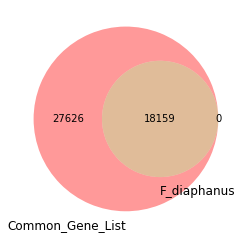

18016


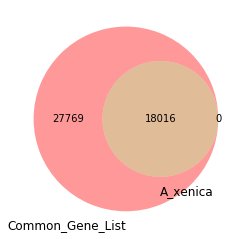

19035


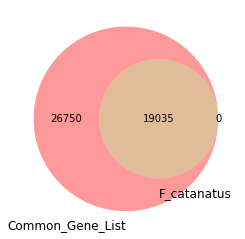

18664


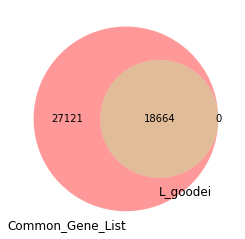

19095


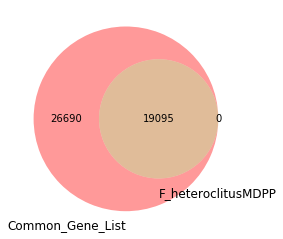

18602


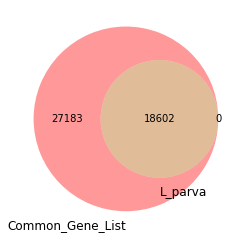

17766


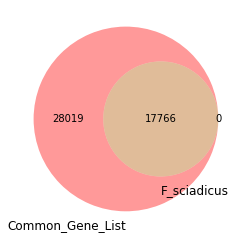

18725


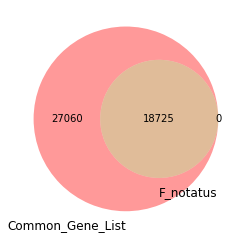

18395


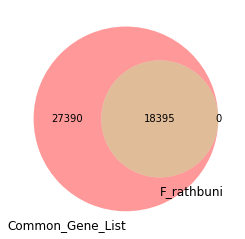

18980


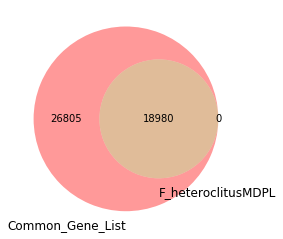

17527


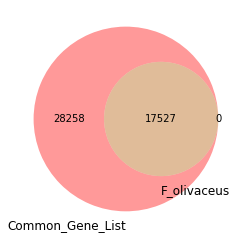

19537


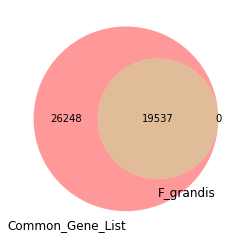

18705


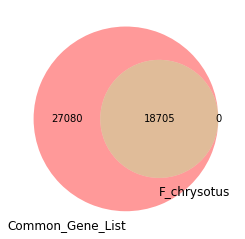

18103


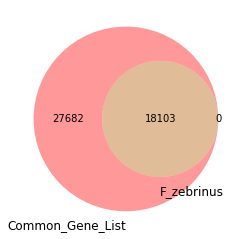

18089


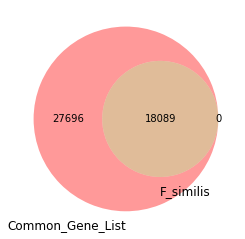

19080


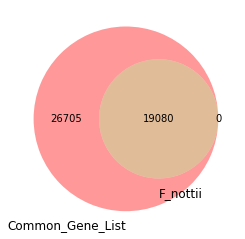

15643


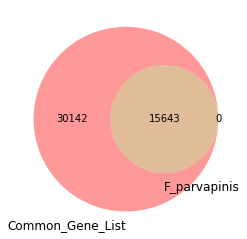

In [17]:
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['GeneName'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [18]:
species_counts = pd.DataFrame()
species_counts['GeneName'] = ""  
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(gene_out_dir+genes_file)
        #table_short = table[['GeneName']]
        table_short = table.drop('Note',1)
        table_short = table_short.drop('database',1)
        table_short = table_short.drop('Dbxref',1)
        #table_short = table_short.drop('annotationStart',1)
        #table_short = table_short.drop('annotationEnd',1)
        #table_short = table_short.drop('annotationLength',1)
        #table_short = table_short.drop('FhetNCBIName',1)
        #table_short = table_short.drop('FhetNCBIStart',1)
        #table_short = table_short.drop('FhetNCBIEnd',1)
        #table_short = table_short.drop('FhetNCBILength',1)
        #table_short = table_short.drop('NCBIproteinID',1)
        #table_short = table_short.drop('NCBIproteinName',1)
        table_short = table_short.drop('Unnamed: 0',1)
        table_short = table_short.drop('TrinityGene',1)
        table_short = table_short.drop('dammitSeqID',1)
        table_short = table_short.drop('TrinityContig',1)
        #df[df['A'].isin([3, 6])]
        #species_counts = pd.merge(species_counts,table_short,on='GeneName',how='outer')
        counts = table_short[table_short['GeneName'].isin(gene_list_common)]
        species_counts = pd.merge(species_counts,counts,on='GeneName',how='outer')
        #print(table_short.shape)
        print(species_counts.shape)

F_diaphanus
(18159, 16)
A_xenica
(22861, 34)
F_catanatus
(26522, 50)
L_goodei
(29301, 68)
F_heteroclitusMDPP
(31859, 86)
L_parva
(33456, 104)
F_sciadicus
(34915, 117)
F_notatus
(36521, 135)
F_rathbuni
(37660, 153)
F_heteroclitusMDPL
(38885, 171)
F_olivaceus
(39690, 188)
F_grandis
(41020, 206)
F_chrysotus
(42120, 223)
F_zebrinus
(43038, 236)
F_similis
(43841, 254)
F_nottii
(45322, 265)
F_parvapinis
(45785, 282)


In [19]:
species_counts = species_counts.fillna(0)

In [20]:
cols = species_counts.columns.tolist()
GeneName_position = cols.index('GeneName')
cols = [cols[GeneName_position]] + cols[:GeneName_position] + cols[GeneName_position+1:]
species_counts = species_counts[cols]

In [21]:
species_counts_test = species_counts

In [24]:
species_counts.shape

(45785, 1290)

In [22]:
species_counts_test.shape

(45785, 1290)

In [23]:
species_counts_test.columns

Index(['GeneName', 'F_diaphanus_BW_1.quant', 'F_diaphanus_BW_2.quant',
       'F_diaphanus_FW_2.quant', 'F_diaphanus_FW_3.quant',
       'F_diaphanus_transfer_1.quant', 'F_diaphanus_transfer_2.quant',
       'annotationStart_x', 'annotationStart_x', 'annotationStart_x',
       ...
       'F_parvapinis_transfer_2.quant', 'annotationStart', 'annotationEnd',
       'annotationLength', 'FhetNCBIName', 'FhetNCBIStart', 'FhetNCBIEnd',
       'FhetNCBILength', 'NCBIproteinID', 'NCBIproteinName'],
      dtype='object', length=1290)

In [82]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_26June2018.csv")

In [156]:
cols = cols[1:]

In [157]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"BW_Clade3",
 "F_diaphanus":"BW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"BW_Clade1",
 "F_heteroclitusMDPP":"FW_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"BW_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"BW",
 "F_diaphanus":"BW","F_grandis":"M","F_heteroclitusMDPL":"BW",
 "F_heteroclitusMDPP":"FW","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"BW","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [158]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
for col in cols:
    species = col.split("_")[0]+"_"+col.split("_")[1]
    species_list.append(species)
    physiology = phys_design[species]
    physiology_list.append(physiology)
    clade = clade_design[species]
    clade_list.append(clade)
    design = combined_design[species]
    combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))

129
129
129
129


In [159]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
#df.head()
species_counts_test = species_counts_test.append(df)
species_counts_test = species_counts_test.append(df2)
species_counts_test = species_counts_test.append(df3)
species_counts_test = species_counts_test.append(df4)
print(species_counts_test.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(45789, 129)


In [160]:
species_counts_test.tail(4)

,GeneName,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,...,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
0,Empty,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,A_xenica,A_xenica,A_xenica,...,F_notti,F_notti,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis
0,Empty,BW,BW,BW,BW,BW,BW,M,M,M,...,FW,FW,BW,BW,BW,BW,BW,BW,BW,BW
0,Empty,Clade1,Clade1,Clade1,Clade1,Clade1,Clade1,Clade3,Clade3,Clade3,...,Clade3,Clade3,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2
0,Empty,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,M_Clade3,M_Clade3,M_Clade3,...,FW_Clade3,FW_Clade3,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2


In [161]:
species_counts_test.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_26June2018_test.csv")